In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Heart attack.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333,1
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.666667,1
2,0.5,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667,1
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000,1
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667,1


In [5]:
df.shape

(9722, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9722 non-null   float64
 1   age                9722 non-null   float64
 2   hypertension       9722 non-null   float64
 3   heart_disease      9722 non-null   float64
 4   ever_married       9722 non-null   float64
 5   work_type          9722 non-null   float64
 6   Residence_type     9722 non-null   float64
 7   avg_glucose_level  9722 non-null   float64
 8   bmi                9722 non-null   float64
 9   smoking_status     9722 non-null   float64
 10  stroke             9722 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 835.6 KB


In [7]:
df.isnull().sum().sort_values(ascending = False).head(5)

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0


In [8]:
df.duplicated().sum()

0

In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler()
X = my_scaler.fit_transform(X)

# Spliting Data
### train test split

In [11]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.20, random_state=100, stratify=y)

In [12]:
X_train.shape ,y_train.shape

((7777, 10), (7777,))

In [13]:
X_test.shape ,y_test.shape

((1945, 10), (1945,))

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
"""
Gini is faster and works well for most cases. (Speed Faster)
Entropy provides more precise splits but is computationally expensive. (speed Slower than Gini)
Log Loss is used when probability estimates are required. (speed Slowest)
"""
DTModel = DecisionTreeClassifier(criterion='gini') #'log_loss', 'entropy', 'gini'
DTModel.fit(X_train,y_train)
print('DTModel Train Score is : ',DTModel.score(X_train,y_train))
print('DTModel Test Score is : ',DTModel.score(X_test,y_test))

DTModel Train Score is :  1.0
DTModel Test Score is :  0.900771208226221


In [18]:
y_pred=DTModel.predict(X_test)

In [19]:
print('actual Output  : ',(y_test[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [0, 0, 1, 1, 1]
predict output :  [0, 0, 1, 1, 1]


In [20]:
from sklearn.metrics import classification_report ,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[863, 110],
       [ 83, 889]])

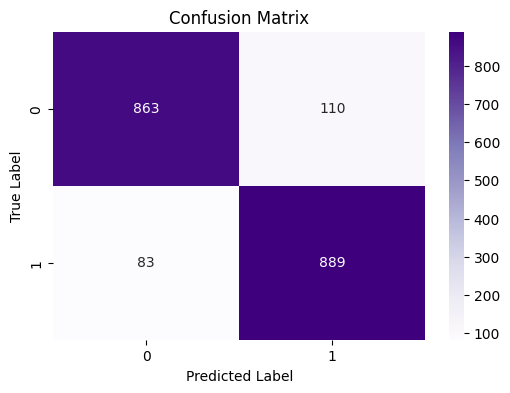

In [26]:
# رسم المصفوفة باستخدام Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
#cmap="Blues" or "coolwarm" or "Greens" or "Reds" or "Purples" or "Oranges" or "magma" or "cividis" or "viridis"
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       973
           1       0.95      0.96      0.96       972

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



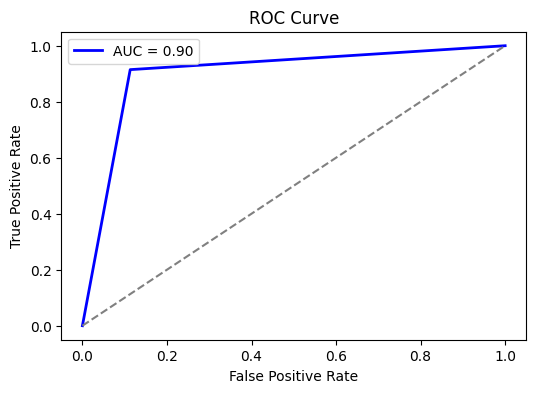

In [36]:
from sklearn.metrics import roc_curve, auc

y_probs = DTModel.predict_proba(X_test)[:,1]  # الحصول على الاحتمالات للفئة الإيجابية
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr) #False Positive Rate  FPR=FP/TN+FP​(It represents the proportion of negative samples that were incorrectly classified as positive.)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # الخط العشوائي
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
#إذا كان AUC قريبًا من 1، فهذا يعني أن النموذج جيد، وإذا كان قريبًا من 0.5، فالنموذج ضعيف.


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators=20,criterion='entropy',max_depth=50)
RFModel.fit(X_train,y_train)
print('DTModel Train Score is : ',RFModel.score(X_train,y_train))
print('DTModel Test Score is : ',RFModel.score(X_test,y_test))

DTModel Train Score is :  0.9994856628519995
DTModel Test Score is :  0.9573264781491002


In [28]:
y_pred=RFModel.predict(X_test)

In [29]:
print('actual Output  : ',(y_test[:5].tolist()))
print('predict output : ',y_pred[:5].tolist())

actual Output  :  [0, 0, 1, 1, 1]
predict output :  [0, 0, 1, 1, 1]


In [30]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[928,  45],
       [ 38, 934]])

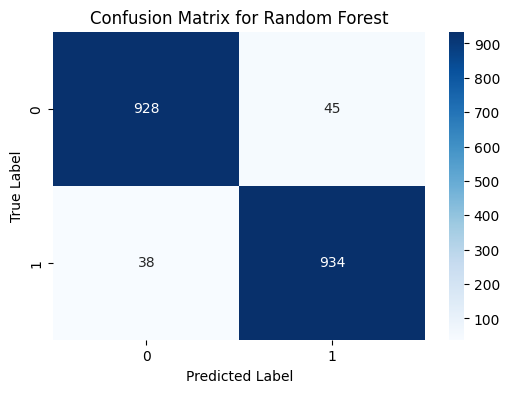

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       973
           1       0.95      0.96      0.96       972

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



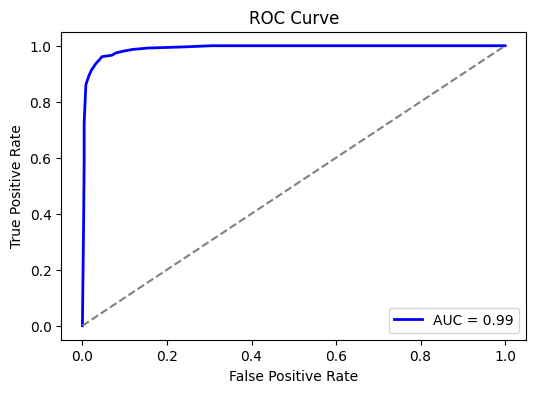

In [34]:
from sklearn.metrics import roc_curve, auc

y_probs = RFModel.predict_proba(X_test)[:,1]  # الحصول على الاحتمالات للفئة الإيجابية
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr) #False Positive Rate  FPR=FP/TN+FP​(It represents the proportion of negative samples that were incorrectly classified as positive.)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # الخط العشوائي
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
#إذا كان AUC قريبًا من 1، فهذا يعني أن النموذج جيد، وإذا كان قريبًا من 0.5، فالنموذج ضعيف.


# SVM **Model**

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 0,C=.001) # # You can change kernel: 'linear', 'poly', 'rbf', 'sigmoid'
classifier.fit(X_train, y_train)
acc_train = classifier.score(X_train,y_train)
print(acc_train)

0.6996271055676996


In [42]:
y_pred = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)


0.7012853470437018


# **Difference Between SVM Kernels ('linear', 'poly', 'rbf', 'sigmoid')**


The kernel function in SVM determines how the data is mapped into a higher-dimensional space to make it separable. The choice of the kernel depends on the nature of the dataset.

Linear Kernel (kernel='linear')

✅ Best for: Linearly separable data
Pros:

    Fast training and prediction.
    Works well when data is already linearly separable.
     Cons:

    Cannot handle non-linear relationships.
📌 When to Use?

    When the dataset is linearly separable (i.e., a straight line can separate the classes).
    When interpretability is important.

In [43]:
classifier = SVC(kernel='sigmoid', gamma=.02,random_state = 0,C=500)
classifier.fit(X_train, y_train)
acc_train = classifier.score(X_train,y_train)
print(acc_train)

0.7288157387167288


In [44]:
y_pred = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

0.7377892030848329


# **Sigmoid Kernel (kernel='sigmoid')**

✅ Best for: When the relationship is similar to a neural network activation function.
✅ Pros:

    Similar to a neural network with a single hidden layer.
    Can be useful when dealing with probabilistic problems.

✅ Cons:

    Often performs worse than RBF.
    Can lead to convergence issues.
📌 When to Use?

    Rarely used, but can be tested when the data behaves similarly to a neural network activation function.

In [45]:
classifier = SVC(kernel='poly', degree=3,random_state = 0,C=.01)
classifier.fit(X_train, y_train)
acc_train = classifier.score(X_train,y_train)
print(acc_train)

0.7871930050147872


In [46]:
y_pred = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(acc_test)

0.7964010282776349


Polynomial Kernel (kernel='poly')

✅ Best for: Data that follows a polynomial decision boundary.

✅ Pros:

    Can model more complex patterns than a linear kernel.
    Useful when the decision boundary is curved.

✅ Cons:

    Computationally expensive.
    More prone to overfitting with high degrees.
📌 When to Use?

    When data is not linearly separable but follows a polynomial decision boundary.
    When higher-degree interactions are needed.


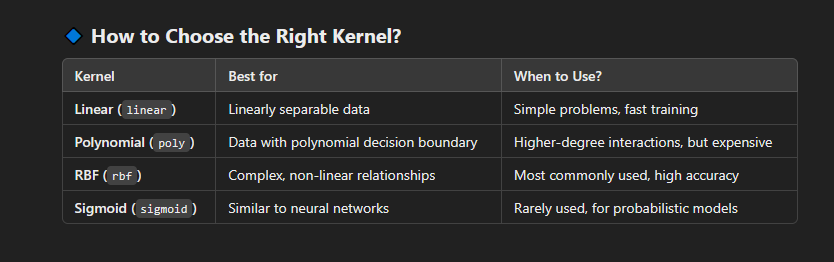